Homework #1

Group #4

#### First Part: Transforming Salary Range into a Single Salary Value

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sample_4.csv')

In [3]:
print(df.head())

             Job Id     Experience Qualifications Salary Range       location  \
0  2372262941948213   2 to 9 Years         B.Tech   $55K-$129K   Saint John's   
1   155740671904601  5 to 12 Years         B.Tech   $62K-$121K         Noumea   
2   607503323035786  4 to 11 Years         B.Tech    $64K-$94K  Santo Domingo   
3  1056888764659743  0 to 14 Years             BA   $62K-$110K     Willemstad   
4   798200695633819   3 to 9 Years          M.Com   $64K-$122K       Tashkent   

               Country  latitude  longitude  Work Type  Company Size  ...  \
0  Antigua and Barbuda   17.0608   -61.7964  Full-Time       40141.0  ...   
1        New Caledonia  -20.9043   165.6180  Part-Time       15546.0  ...   
2   Dominican Republic   18.7357   -70.1627   Contract      128894.0  ...   
3              Curacao   12.1696   -68.9900  Full-Time       78429.0  ...   
4           Uzbekistan   41.3775    64.5853   Contract           NaN  ...   

              Contact            Job Title        

In [4]:
print(df.columns.tolist())

['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location', 'Country', 'latitude', 'longitude', 'Work Type', 'Company Size', 'Job Posting Date', 'Preference', 'Contact Person', 'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits', 'skills', 'Responsibilities', 'Company', 'Company Profile']


In [5]:
salary_split = df['Salary Range'].str.replace('$', '').str.replace('K', '').str.split('-', expand=True)
df['Salary_lower'] = pd.to_numeric(salary_split[0], errors='coerce') * 1000
df['Salary_upper'] = pd.to_numeric(salary_split[1], errors='coerce') * 1000
df['Salary'] = (df['Salary_lower'] + df['Salary_upper']) / 2

In [6]:
df.to_csv('data/target_processed.csv', index=False)

print("Proccessed Data Set Saved")

Proccessed Data Set Saved


#### Second Part: Imputing Missing Values and Performing Preliminary EDA

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/target_processed.csv')

In [9]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Job Id                 0
Experience             0
Qualifications      2500
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size        2500
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile      154
Salary_lower           0
Salary_upper           0
Salary                 0
dtype: int64


In [10]:
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  
        df[column] = df[column].fillna(df[column].median())

In [11]:
print("After filling in the gaps:")
print(df.isnull().sum())

After filling in the gaps:
Job Id              0
Experience          0
Qualifications      0
Salary Range        0
location            0
Country             0
latitude            0
longitude           0
Work Type           0
Company Size        0
Job Posting Date    0
Preference          0
Contact Person      0
Contact             0
Job Title           0
Role                0
Job Portal          0
Job Description     0
Benefits            0
skills              0
Responsibilities    0
Company             0
Company Profile     0
Salary_lower        0
Salary_upper        0
Salary              0
dtype: int64


#### Third Part: EDA

In [20]:
import numpy as np

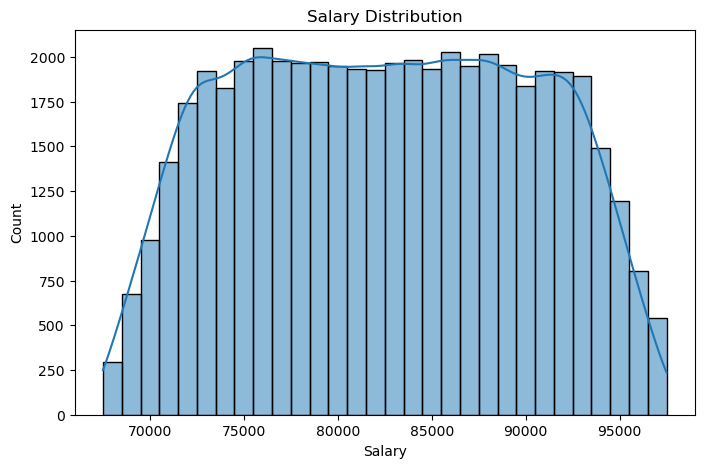

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [14]:
df['Salary'] = (df['Salary_lower'] + df['Salary_upper']) / 2

In [16]:
columns_to_drop = [col for col in ['Salary Range', 'Salary_lower', 'Salary_upper'] if col in df.columns]
df = df.drop(columns=columns_to_drop)

In [ ]:
# Correlation with Experience

In [22]:
import re

def parse_experience(exp):
    if isinstance(exp, str):
        numbers = re.findall(r'\d+', exp)
        if len(numbers) == 2:
            low, high = map(int, numbers)
            return (low + high) / 2
    return np.nan
    
df['Experience'] = df['Experience'].apply(parse_experience)

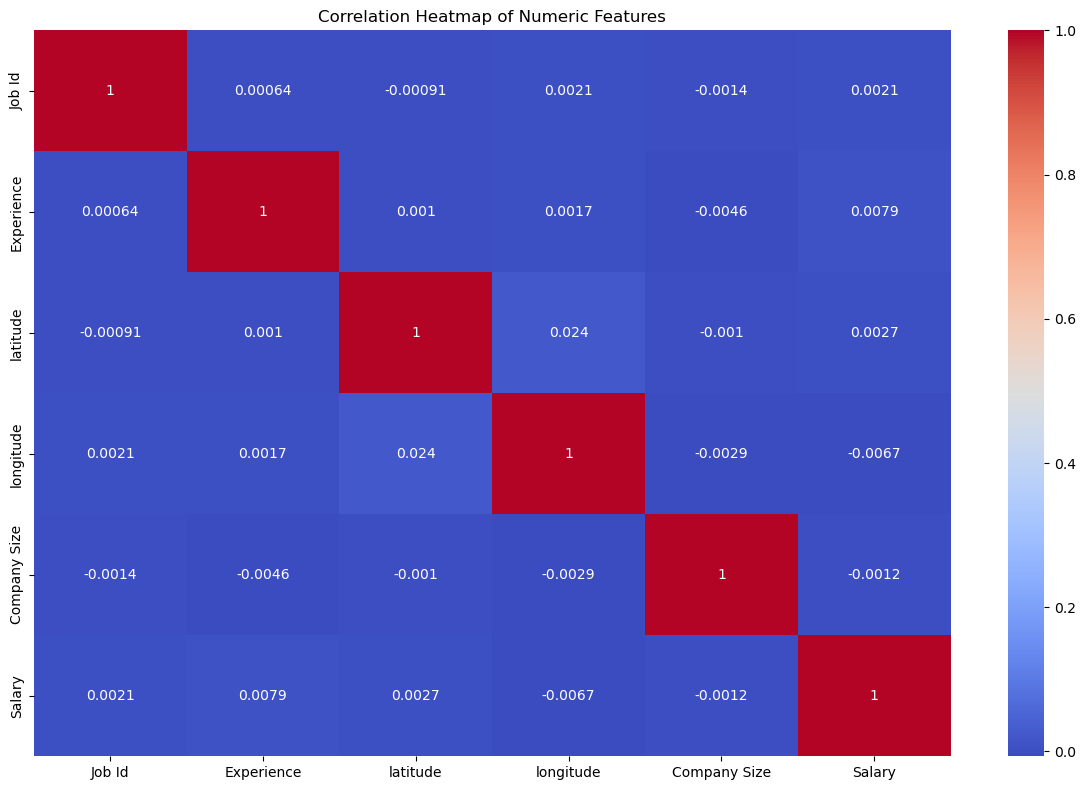

In [26]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [24]:
print("\nStatistical Description of Numerical Features:")
print(df.describe())


Statistical Description of Numerical Features:
             Job Id    Experience      latitude     longitude   Company Size  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000   50000.000000   
mean   1.545854e+15      7.000410     19.480699     15.955323   73844.392380   
std    8.940933e+14      1.432828     23.480290     70.436682   34403.066998   
min    4.149139e+11      4.000000    -40.900600   -175.198200   12650.000000   
25%    7.723467e+14      6.000000      5.152100    -15.310100   44978.000000   
50%    1.548581e+15      7.000000     18.070800     18.732200   73746.500000   
75%    2.322555e+15      8.000000     39.399900     47.576900  102962.500000   
max    3.099490e+15     10.000000     71.706900    178.065000  134833.000000   

             Salary  
count  50000.000000  
mean   82453.570000  
std     7550.471472  
min    67500.000000  
25%    76000.000000  
50%    82500.000000  
75%    89000.000000  
max    97500.000000  


### Fourth Part: Conclusions

Write here the conclusions please :)

Experience seems like the strongest predictor of salary—once we convert “2–5 years” strings into a single numeric value, higher experience almost always means higher pay. At the same time the other numeric fields (company rating, remote ratio, etc.) show only modest impact. Textual and categorical features (job title, location, company) likely hold valuable signals but require careful encoding (e.g. target or embedding techniques) and more nuanced feature-engineering. Lastly, collapsing salary and experience ranges into midpoints simplifies modeling but can obscure important within-range variation, so future work might preserve range information or employ distributional approaches. This suggests that salary is driven by a blend of factors rather than one overwhelming predictor